In [1]:
import urllib.request 
import json 
import pandas as pd 
from pandas.io.json import json_normalize

In [2]:
url = "http://openapi.seoul.go.kr:8088/4a514a446c62696b313132665a4c436c/json/CardSubwayStatsNew/1/1000/20220301"

In [3]:
response = urllib.request.urlopen("http://openapi.seoul.go.kr:8088/4a514a446c62696b313132665a4c436c/json/CardSubwayStatsNew/1/1000/20220301") 
json_str = response.read().decode("utf-8")

In [4]:
json_object = json.loads(json_str)

In [5]:
json_object

{'CardSubwayStatsNew': {'list_total_count': 593,
  'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'row': [{'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '서울역',
    'RIDE_PASGR_NUM': 20994.0,
    'ALIGHT_PASGR_NUM': 19468.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '시청',
    'RIDE_PASGR_NUM': 12439.0,
    'ALIGHT_PASGR_NUM': 12379.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '종각',
    'RIDE_PASGR_NUM': 15750.0,
    'ALIGHT_PASGR_NUM': 13544.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '종로3가',
    'RIDE_PASGR_NUM': 16349.0,
    'ALIGHT_PASGR_NUM': 14533.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '종로5가',
    'RIDE_PASGR_NUM': 14036.0,
    'ALIGHT_PASGR_NUM': 13472.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'S

In [6]:
df=pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
df

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20220301,1호선,서울역,20994.0,19468.0,20220304
1,20220301,1호선,시청,12439.0,12379.0,20220304
2,20220301,1호선,종각,15750.0,13544.0,20220304
3,20220301,1호선,종로3가,16349.0,14533.0,20220304
4,20220301,1호선,종로5가,14036.0,13472.0,20220304
...,...,...,...,...,...,...
588,20220301,중앙선,오빈,189.0,176.0,20220304
589,20220301,중앙선,양평,1515.0,1442.0,20220304
590,20220301,중앙선,원덕,185.0,192.0,20220304
591,20220301,중앙선,용문,1286.0,1181.0,20220304


In [7]:
dt_index = pd.date_range(start='20220301', end='20220315')
dt_index

DatetimeIndex(['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12',
               '2022-03-13', '2022-03-14', '2022-03-15'],
              dtype='datetime64[ns]', freq='D')

In [8]:
dt_list = dt_index.strftime("%Y%m%d").tolist()
dt_list

['20220301',
 '20220302',
 '20220303',
 '20220304',
 '20220305',
 '20220306',
 '20220307',
 '20220308',
 '20220309',
 '20220310',
 '20220311',
 '20220312',
 '20220313',
 '20220314',
 '20220315']

In [9]:
dt_index = pd.date_range(start='20220301', end='20220315')
dt_list = dt_index.strftime("%Y%m%d").tolist()

for i in dt_list:
    url="http://openapi.seoul.go.kr:8088/4a514a446c62696b313132665a4c436c/json/CardSubwayStatsNew/1/1000/" + i
    response = urllib.request.urlopen(url) 
    json_str = response.read().decode("utf-8")
    json_object = json.loads(json_str)
    df_temp=pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
    df=df.append(df_temp)

In [10]:
df.columns = ['사용일자', '호선명', '역명', '승차총승객수', '하차총승객수', '등록일자']
df

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자
0,20220301,1호선,서울역,20994.0,19468.0,20220304
1,20220301,1호선,시청,12439.0,12379.0,20220304
2,20220301,1호선,종각,15750.0,13544.0,20220304
3,20220301,1호선,종로3가,16349.0,14533.0,20220304
4,20220301,1호선,종로5가,14036.0,13472.0,20220304
...,...,...,...,...,...,...
589,20220315,중앙선,오빈,296.0,294.0,20220318
590,20220315,중앙선,양평,2417.0,2473.0,20220318
591,20220315,중앙선,원덕,330.0,330.0,20220318
592,20220315,중앙선,용문,2820.0,2778.0,20220318


In [11]:
df = df.drop('등록일자', axis= 1)
df

,사용일자,호선명,역명,승차총승객수,하차총승객수
0,20220301,1호선,서울역,20994.0,19468.0
1,20220301,1호선,시청,12439.0,12379.0
2,20220301,1호선,종각,15750.0,13544.0
3,20220301,1호선,종로3가,16349.0,14533.0
4,20220301,1호선,종로5가,14036.0,13472.0
...,...,...,...,...,...
589,20220315,중앙선,오빈,296.0,294.0
590,20220315,중앙선,양평,2417.0,2473.0
591,20220315,중앙선,원덕,330.0,330.0
592,20220315,중앙선,용문,2820.0,2778.0


In [12]:
df['총합산승객수'] = df['승차총승객수'] + df['하차총승객수']
df

,사용일자,호선명,역명,승차총승객수,하차총승객수,총합산승객수
0,20220301,1호선,서울역,20994.0,19468.0,40462.0
1,20220301,1호선,시청,12439.0,12379.0,24818.0
2,20220301,1호선,종각,15750.0,13544.0,29294.0
3,20220301,1호선,종로3가,16349.0,14533.0,30882.0
4,20220301,1호선,종로5가,14036.0,13472.0,27508.0
...,...,...,...,...,...,...
589,20220315,중앙선,오빈,296.0,294.0,590.0
590,20220315,중앙선,양평,2417.0,2473.0,4890.0
591,20220315,중앙선,원덕,330.0,330.0,660.0
592,20220315,중앙선,용문,2820.0,2778.0,5598.0


In [13]:
# 2호선 추출

filt = df['호선명'].str.contains('2호선')
df[filt]

,사용일자,호선명,역명,승차총승객수,하차총승객수,총합산승객수
10,20220301,2호선,시청,8191.0,6299.0,14490.0
11,20220301,2호선,을지로입구,17384.0,16462.0,33846.0
12,20220301,2호선,을지로3가,6862.0,6227.0,13089.0
13,20220301,2호선,을지로4가,5373.0,5232.0,10605.0
14,20220301,2호선,동대문역사문화공원(DDP),7724.0,8706.0,16430.0
...,...,...,...,...,...,...
55,20220315,2호선,신설동,2821.0,2891.0,5712.0
56,20220315,2호선,도림천,1365.0,1416.0,2781.0
57,20220315,2호선,양천구청,6127.0,6494.0,12621.0
58,20220315,2호선,신정네거리,9336.0,9729.0,19065.0


In [14]:
df = df[filt]
df

,사용일자,호선명,역명,승차총승객수,하차총승객수,총합산승객수
10,20220301,2호선,시청,8191.0,6299.0,14490.0
11,20220301,2호선,을지로입구,17384.0,16462.0,33846.0
12,20220301,2호선,을지로3가,6862.0,6227.0,13089.0
13,20220301,2호선,을지로4가,5373.0,5232.0,10605.0
14,20220301,2호선,동대문역사문화공원(DDP),7724.0,8706.0,16430.0
...,...,...,...,...,...,...
55,20220315,2호선,신설동,2821.0,2891.0,5712.0
56,20220315,2호선,도림천,1365.0,1416.0,2781.0
57,20220315,2호선,양천구청,6127.0,6494.0,12621.0
58,20220315,2호선,신정네거리,9336.0,9729.0,19065.0


In [27]:
df = df.loc[df['총합산승객수'] >= 70000][['역명','승차총승객수','하차총승객수', '총합산승객수']]
df

,역명,승차총승객수,하차총승객수,총합산승객수
31,강남,78169.0,77067.0,155236.0
31,강남,76815.0,76546.0,153361.0
31,강남,76264.0,75532.0,151796.0
31,강남,72968.0,71746.0,144714.0
31,강남,72584.0,71204.0,143788.0
...,...,...,...,...
20,성수,34223.0,36965.0,71188.0
35,사당,33851.0,37200.0,71051.0
20,성수,33966.0,36623.0,70589.0
35,사당,33285.0,36955.0,70240.0


In [57]:
# to numpy
df_numpy = df.to_numpy()

In [58]:
print(df_numpy)

[['강남' 78169.0 77067.0 155236.0]
 ['강남' 76815.0 76546.0 153361.0]
 ['강남' 76264.0 75532.0 151796.0]
 ['강남' 72968.0 71746.0 144714.0]
 ['강남' 72584.0 71204.0 143788.0]
 ['강남' 72596.0 71082.0 143678.0]
 ['강남' 72534.0 70880.0 143414.0]
 ['강남' 72143.0 70514.0 142657.0]
 ['강남' 70027.0 68675.0 138702.0]
 ['잠실(송파구청)' 59513.0 59605.0 119118.0]
 ['신림' 59862.0 58228.0 118090.0]
 ['신림' 59125.0 57517.0 116642.0]
 ['잠실(송파구청)' 58332.0 57823.0 116155.0]
 ['신림' 58736.0 57181.0 115917.0]
 ['신림' 58697.0 57185.0 115882.0]
 ['신림' 58677.0 57204.0 115881.0]
 ['잠실(송파구청)' 57734.0 57757.0 115491.0]
 ['홍대입구' 56036.0 59447.0 115483.0]
 ['잠실(송파구청)' 57042.0 56755.0 113797.0]
 ['신림' 57375.0 55712.0 113087.0]
 ['잠실(송파구청)' 57715.0 55148.0 112863.0]
 ['잠실(송파구청)' 56221.0 56212.0 112433.0]
 ['신림' 56843.0 55397.0 112240.0]
 ['신림' 56546.0 55274.0 111820.0]
 ['홍대입구' 53670.0 57034.0 110704.0]
 ['구로디지털단지' 55178.0 55399.0 110577.0]
 ['잠실(송파구청)' 55247.0 55030.0 110277.0]
 ['구로디지털단지' 55097.0 55138.0 110235.0]
 ['구로디지털단지' 54687.0 

In [59]:
df_numpy

array([['강남', 78169.0, 77067.0, 155236.0],
       ['강남', 76815.0, 76546.0, 153361.0],
       ['강남', 76264.0, 75532.0, 151796.0],
       ['강남', 72968.0, 71746.0, 144714.0],
       ['강남', 72584.0, 71204.0, 143788.0],
       ['강남', 72596.0, 71082.0, 143678.0],
       ['강남', 72534.0, 70880.0, 143414.0],
       ['강남', 72143.0, 70514.0, 142657.0],
       ['강남', 70027.0, 68675.0, 138702.0],
       ['잠실(송파구청)', 59513.0, 59605.0, 119118.0],
       ['신림', 59862.0, 58228.0, 118090.0],
       ['신림', 59125.0, 57517.0, 116642.0],
       ['잠실(송파구청)', 58332.0, 57823.0, 116155.0],
       ['신림', 58736.0, 57181.0, 115917.0],
       ['신림', 58697.0, 57185.0, 115882.0],
       ['신림', 58677.0, 57204.0, 115881.0],
       ['잠실(송파구청)', 57734.0, 57757.0, 115491.0],
       ['홍대입구', 56036.0, 59447.0, 115483.0],
       ['잠실(송파구청)', 57042.0, 56755.0, 113797.0],
       ['신림', 57375.0, 55712.0, 113087.0],
       ['잠실(송파구청)', 57715.0, 55148.0, 112863.0],
       ['잠실(송파구청)', 56221.0, 56212.0, 112433.0],
       ['신림', 56

In [60]:
import matplotlib.pyplot as plt
import numpy as np

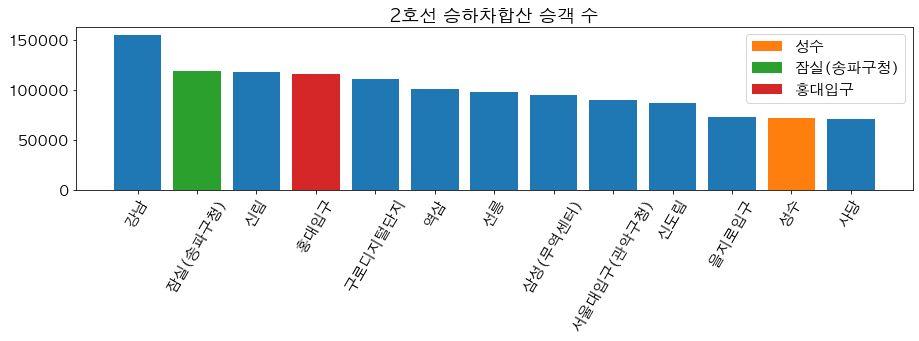

In [66]:
#Plot

plt.rcParams['figure.figsize']=(15,3)
plt.xticks(rotation = 60)
plt.bar(df_numpy[:,0],df_numpy[:,3])
plt.title('2호선 승하차합산 승객 수')
#특정 데이터 위치 찾기
idx = np.where(df_numpy=='성수')
plt.bar(df_numpy[idx[0],0],df_numpy[idx[0],3], label = '성수')


idx = np.where(df_numpy=='잠실(송파구청)')
plt.bar(df_numpy[idx[0],0],df_numpy[idx[0],3], label = '잠실(송파구청)')


idx = np.where(df_numpy=='홍대입구')
plt.bar(df_numpy[idx[0],0],df_numpy[idx[0],3], label = '홍대입구')

plt.legend()

In [71]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.size'] = 15 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False #한글폰트 사용시, 마이너스 글자가 꺠지는 현상을 방지

In [72]:
# 2호선 승하차합산승객수 Top 5
# 1등: [['강남' 155236.0]
# 2등:  ['잠실(송파구청)' 119118.0]
# 3등:  ['신림'118090.0],
# 4등: ['홍대입구', 115483.0],
# 5등:  ['구로디지털단지', 55178.0, 55399.0, 110577.0]

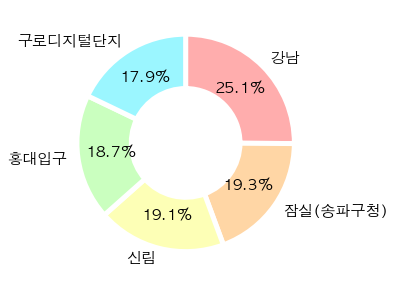

In [85]:
# 원그래프 만들기

values = [155236, 119118, 118090, 115483, 110577]
labels = ['강남', '잠실(송파구청)', '신림', '홍대입구', '구로디지털단지']
fig = plt.figure(figsize=(5,5)) 
colors = ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff']
wedgeprops= {'width': 0.5,'linewidth': 5,'edgecolor': 'w'}

plt.pie(values,
        labels=labels,
        colors=colors, 
        wedgeprops = wedgeprops,
        autopct = '%.1f%%',
        pctdistance = 0.7,
       counterclock = False, 
        startangle = 90)
plt.show()




In [86]:
df

,역명,승차총승객수,하차총승객수,총합산승객수
31,강남,78169.0,77067.0,155236.0
31,강남,76815.0,76546.0,153361.0
31,강남,76264.0,75532.0,151796.0
31,강남,72968.0,71746.0,144714.0
31,강남,72584.0,71204.0,143788.0
...,...,...,...,...
20,성수,34223.0,36965.0,71188.0
35,사당,33851.0,37200.0,71051.0
20,성수,33966.0,36623.0,70589.0
35,사당,33285.0,36955.0,70240.0
